In [14]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=10, activation='step'):
        self.weights = np.zeros(input_size + 1)
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.activation = activation

    def activate(self, x):
        if self.activation == 'step':
            return 1 if x >= 0 else 0
        elif self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-x))
        elif self.activation == 'tanh':
            return np.tanh(x)
        elif self.activation == 'relu':
            return max(0, x)

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.activate(summation)

    def train(self, X, y):
        for _ in range(self.epochs):
            for inputs, label in zip(X, y):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights[1:] += self.learning_rate * error * inputs
                self.weights[0] += self.learning_rate * error

In [15]:
X_train = np.random.rand(8, 3)
y_train = np.random.randint(0, 2, 8)
X_val = np.random.rand(5, 3) 
y_val = np.random.randint(0, 2, 5)

activations = ['step', 'sigmoid', 'tanh', 'relu']
models = {}
for act in activations:
    perceptron = Perceptron(input_size=3, activation=act)
    perceptron.train(X_train, y_train)
    models[act] = perceptron

In [16]:
def plot_decision_boundary(perceptron, X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
    plt.title(title)
    plt.show()

In [17]:
def compare_step_sigmoid():
    print("Comparison of Step Function vs. Sigmoid")
    plot_decision_boundary(models['step'], X_train, y_train, "Step Function")
    plot_decision_boundary(models['sigmoid'], X_train, y_train, "Sigmoid Function")

In [18]:
def compare_sigmoid_tanh():
    print("Comparison of Sigmoid vs. Tanh")
    plot_decision_boundary(models['sigmoid'], X_train, y_train, "Sigmoid Function")
    plot_decision_boundary(models['tanh'], X_train, y_train, "Tanh Function")

In [19]:
def compare_relu_sigmoid():
    print("Comparison of ReLU vs. Sigmoid")
    plot_decision_boundary(models['relu'], X_train, y_train, "ReLU Function")
    plot_decision_boundary(models['sigmoid'], X_train, y_train, "Sigmoid Function")


Comparison of Step Function vs. Sigmoid


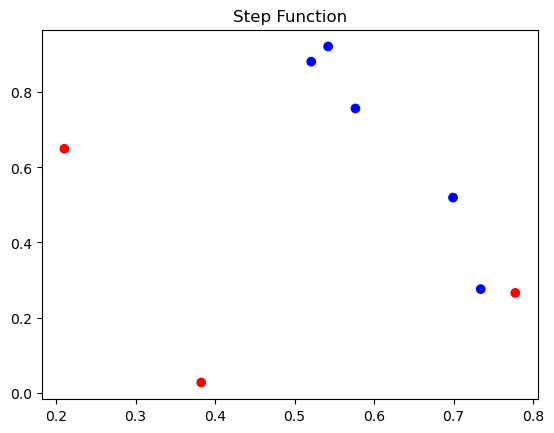

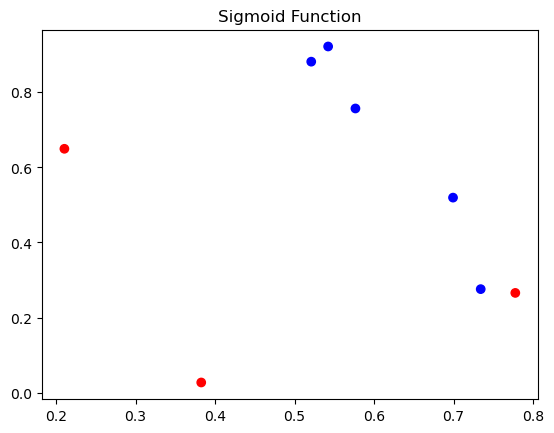

Comparison of Sigmoid vs. Tanh


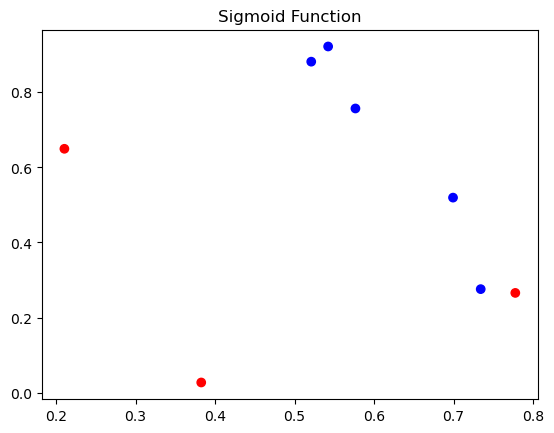

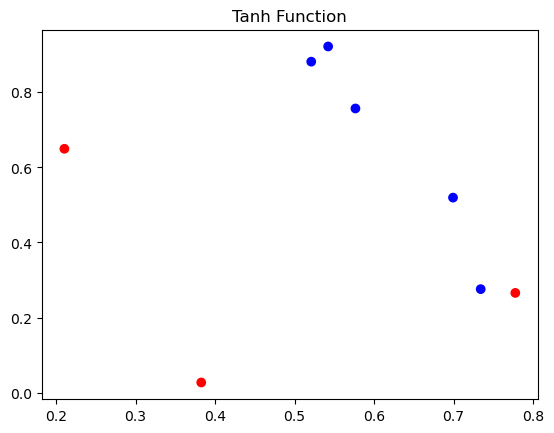

Comparison of ReLU vs. Sigmoid


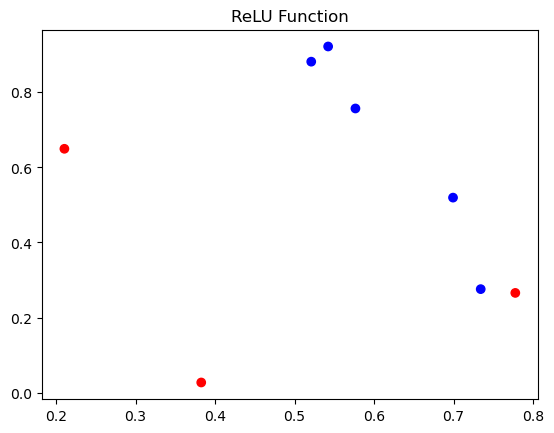

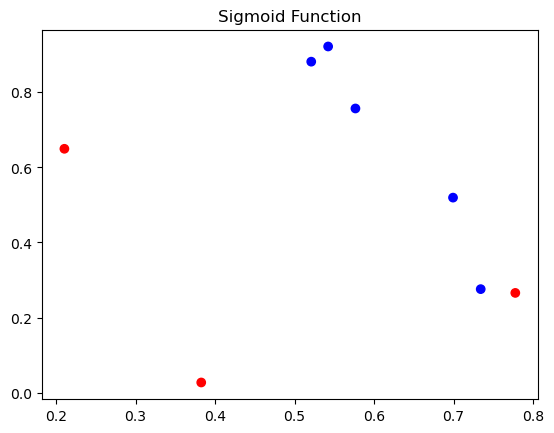

In [20]:
compare_step_sigmoid()
compare_sigmoid_tanh()
compare_relu_sigmoid()
